In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from scipy.stats import median_abs_deviation

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import spatialdata as sd
import spatialdata_plot 

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [6]:
import scanpy as sc

In [8]:
xenium_path = "/lustre/groups/ml01/workspace/mostafa.shahhosseini/data/t2d/zarr/XETG00051__0029181__S188007__20241204__122024.zarr/"

In [9]:
sdata = sd.read_zarr(xenium_path)
sdata

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/zarr/creatio

SpatialData object, with associated Zarr store: /ictstr01/groups/ml01/workspace/mostafa.shahhosseini/data/t2d/zarr/XETG00051__0029181__S188007__20241204__122024.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (4, 40828, 36965), (4, 20414, 18482), (4, 10207, 9241), (4, 5103, 4620), (4, 2551, 2310)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (40828, 36965), (20414, 18482), (10207, 9241), (5103, 4620), (2551, 2310)
│     └── 'nucleus_labels': DataTree[yx] (40828, 36965), (20414, 18482), (10207, 9241), (5103, 4620), (2551, 2310)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (228481, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (228481, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (216287, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (228481, 5101)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (I

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8444290657439448].


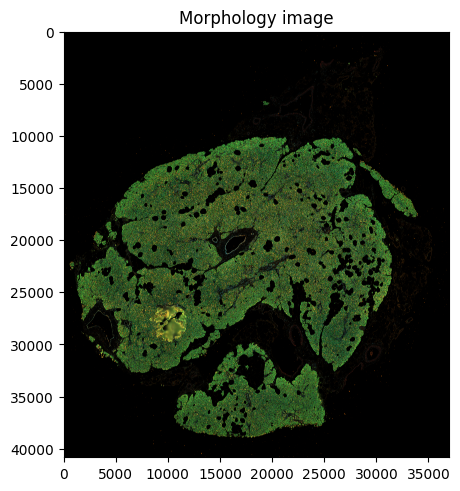

In [10]:
sdata.pl.render_images("morphology_focus").pl.show(title="Morphology image")

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2278815840061514].
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


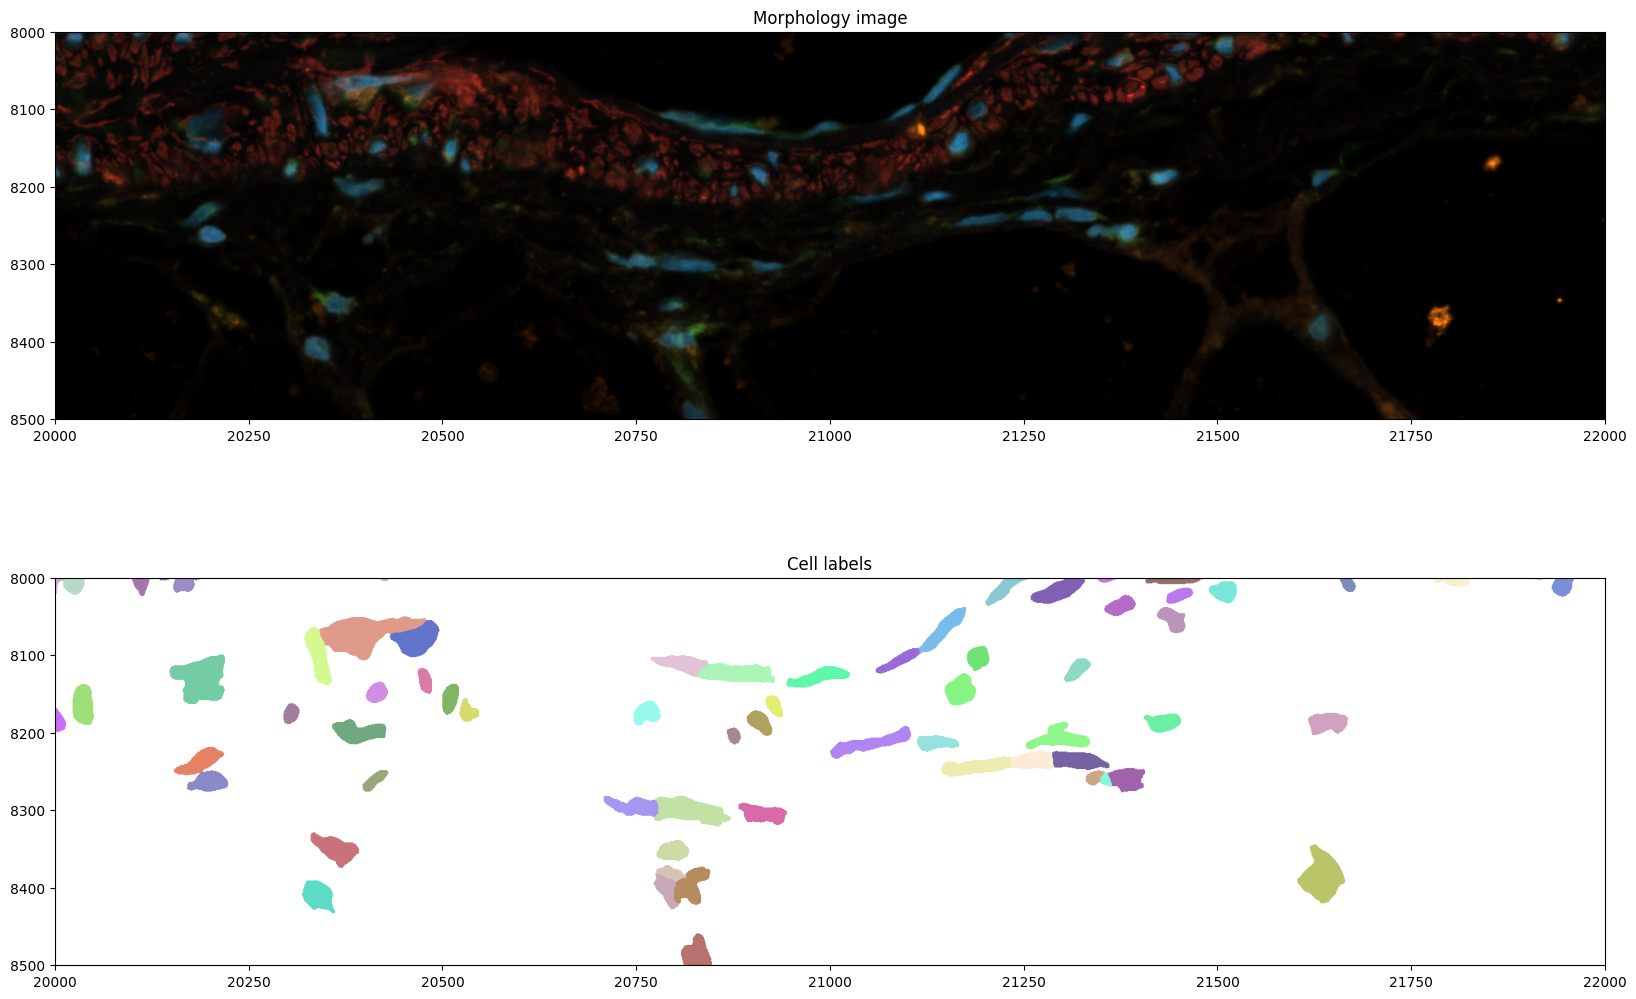

In [11]:
from spatialdata import bounding_box_query

axes = plt.subplots(2, 1, figsize=(20, 13))[1].flatten()


def crop0(x):
    return bounding_box_query(
        x,
        min_coordinate=[20_000, 8000],
        max_coordinate=[22_000, 8500],
        axes=("x", "y"),
        target_coordinate_system="global",
    )


crop0(sdata).pl.render_images("morphology_focus").pl.show(
    ax=axes[0], title="Morphology image", coordinate_systems="global"
)
crop0(sdata).pl.render_labels("cell_labels").pl.show(ax=axes[1], title="Cell labels", coordinate_systems="global")

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


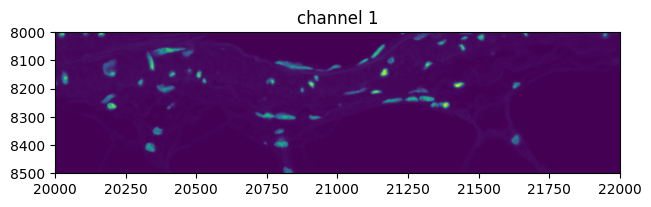

In [12]:
crop0(sdata).pl.render_images("morphology_focus", channel=0).pl.show(title="channel 1", colorbar=False)

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


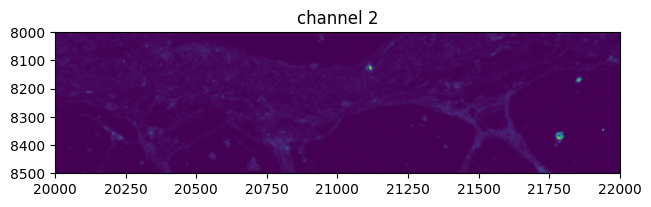

In [13]:
crop0(sdata).pl.render_images("morphology_focus", channel=1).pl.show(title="channel 2", colorbar=False)

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


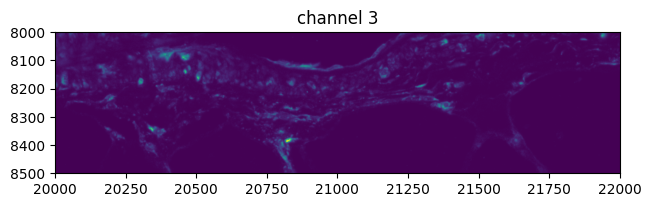

In [14]:
crop0(sdata).pl.render_images("morphology_focus", channel=2).pl.show(title="channel 3", colorbar=False)

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


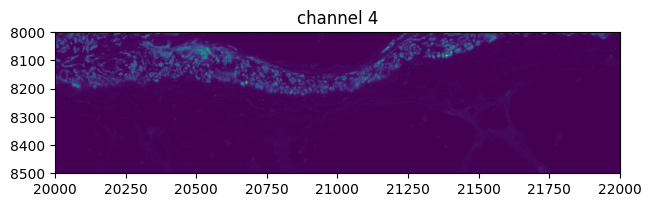

In [15]:
crop0(sdata).pl.render_images("morphology_focus", channel=3).pl.show(title="channel 4", colorbar=False)

In [16]:
adata = sdata['table']

In [17]:
adata

AnnData object with n_obs × n_vars = 228481 × 5101
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [18]:
adata.var_names_make_unique()

In [19]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [20]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 228481 × 5101
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

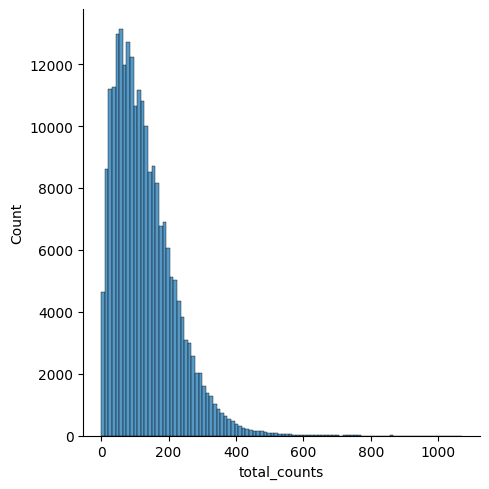

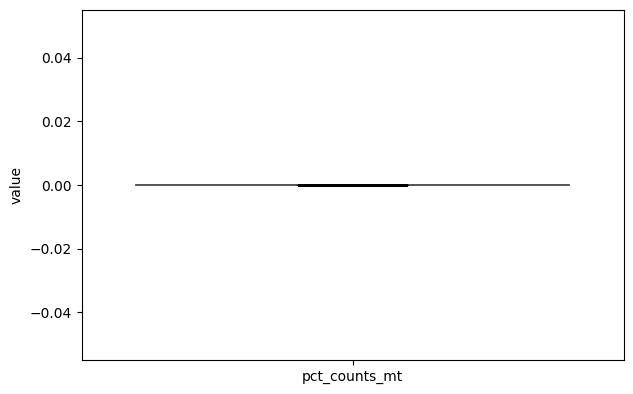

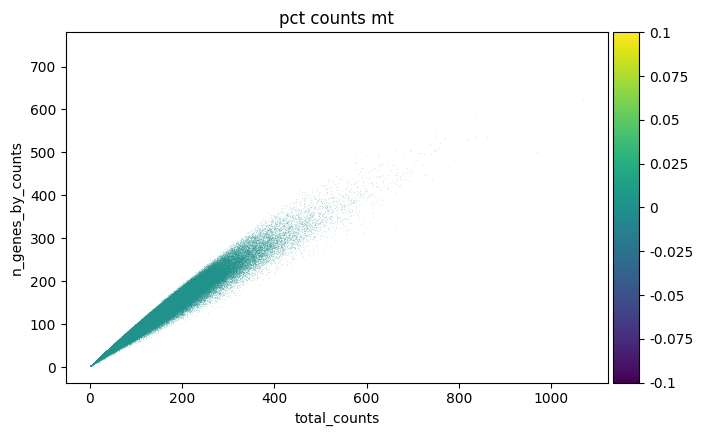

In [21]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

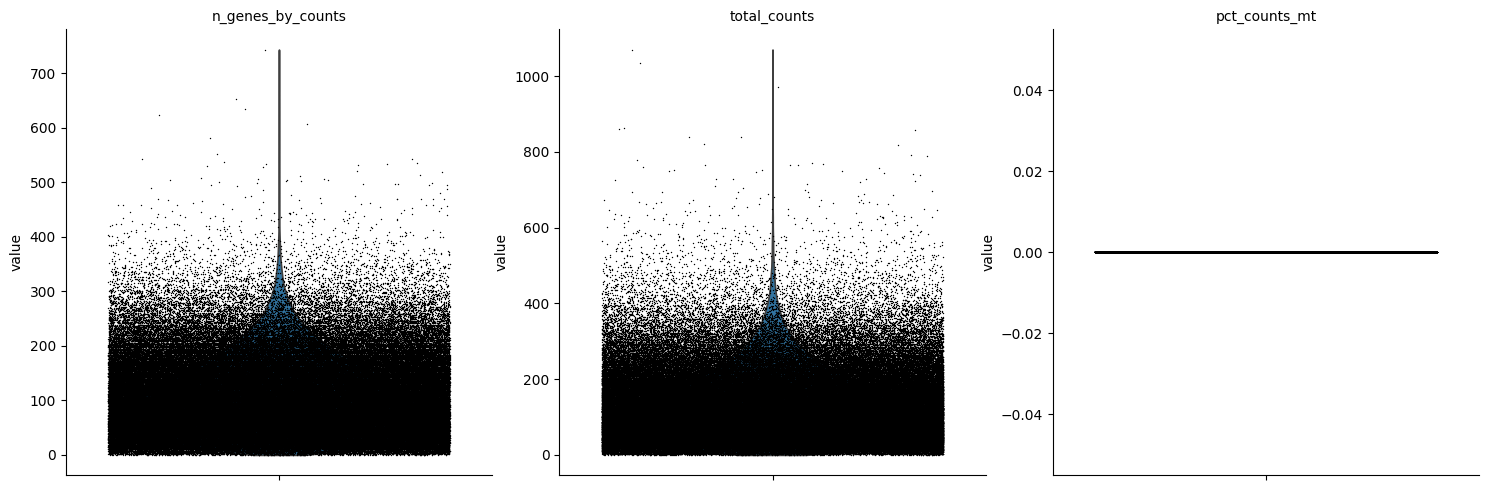

In [22]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [23]:
scales_counts = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


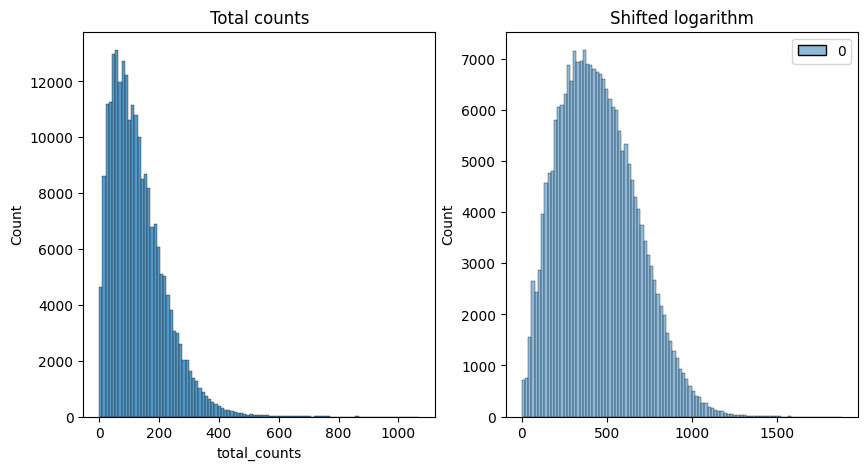

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [25]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [26]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

outlier
False    225486
True       2995
Name: count, dtype: int64

In [27]:
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    228481
Name: count, dtype: int64

In [28]:
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 228481
Number of cells after filtering of low quality cells: 225486


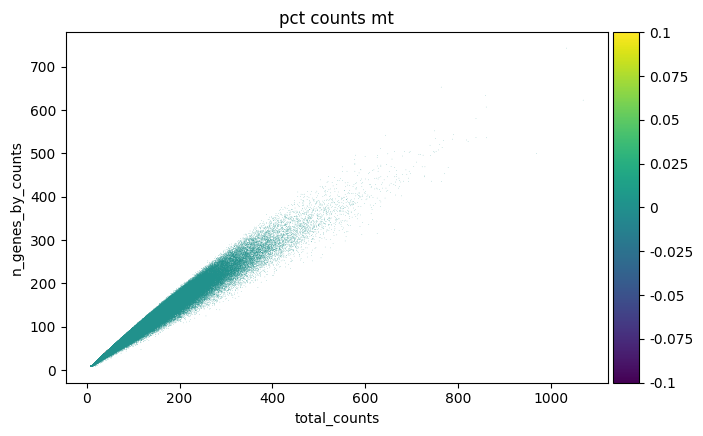

In [29]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [31]:
x = adata.X.todense()

In [32]:
adata.layers['count'] = x

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: Layer 'count' should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [33]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [36]:
sc.experimental.pp.highly_variable_genes(
    adata, n_top_genes=2000
)

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:154: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


In [37]:
markers = adata.var.sort_values('highly_variable_rank', ascending=False).index[:10]

In [40]:
markers

Index(['TSPAN9', 'GREB1L', 'AK4', 'NUP62', 'LRRC38', 'RUBCN', 'ZSCAN16',
       'TUBB3', 'EVI2B', 'SCIMP'],
      dtype='object')

/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/mostafa.shahhosseini/miniconda3/envs/xen/lib/python3.10/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `transcripts` already exists. Overwrit

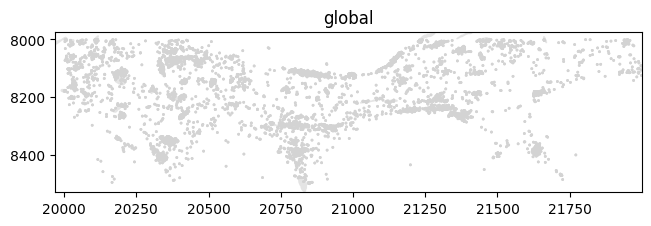

In [41]:
crop0(sdata).pl.render_points(color="gene", groups=list(markers)).pl.render_shapes(
    "nucleus_boundaries", fill_alpha=0.6
).pl.show()